In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (10,6)
df_0 = pd.read_csv("KDDTest+.txt", header=None)
df= df_0.copy()
df.head()
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land' ,'wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])
df.columns = columns
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.040,0.060,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.000,0.060,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.610,0.040,0.610,0.020,0.000,0.000,0.000,0.000,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.000,0.000,1.000,0.280,0.000,0.000,0.000,0.000,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.310,0.170,0.030,0.020,0.000,0.000,0.830,0.710,mscan,11


In [4]:
def unique_values(df, columns):

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [5]:
cat_features = df.select_dtypes(include='object').columns
unique_values(df, cat_features)

Column: protocol_type
------------------------------
Unique Values (3): ['tcp' 'icmp' 'udp']

Value Counts:
protocol_type
tcp     18880
udp      2621
icmp     1043
Name: count, dtype: int64

Column: service
------------------------------
Unique Values (64): ['private' 'ftp_data' 'eco_i' 'telnet' 'http' 'smtp' 'ftp' 'ldap' 'pop_3'
 'courier' 'discard' 'ecr_i' 'imap4' 'domain_u' 'mtp' 'systat' 'iso_tsap'
 'other' 'csnet_ns' 'finger' 'uucp' 'whois' 'netbios_ns' 'link' 'Z39_50'
 'sunrpc' 'auth' 'netbios_dgm' 'uucp_path' 'vmnet' 'domain' 'name' 'pop_2'
 'http_443' 'urp_i' 'login' 'gopher' 'exec' 'time' 'remote_job' 'ssh'
 'kshell' 'sql_net' 'shell' 'hostnames' 'echo' 'daytime' 'pm_dump' 'IRC'
 'netstat' 'ctf' 'nntp' 'netbios_ssn' 'tim_i' 'supdup' 'bgp' 'nnsp' 'rje'
 'printer' 'efs' 'X11' 'ntp_u' 'klogin' 'tftp_u']

Value Counts:
service
http       7853
private    4774
telnet     1626
pop_3      1019
smtp        934
           ... 
printer      11
ntp_u        10
rje           8
tim_i       

In [6]:
df.duplicated().sum()

np.int64(0)

<Figure size 2000x4000 with 0 Axes>

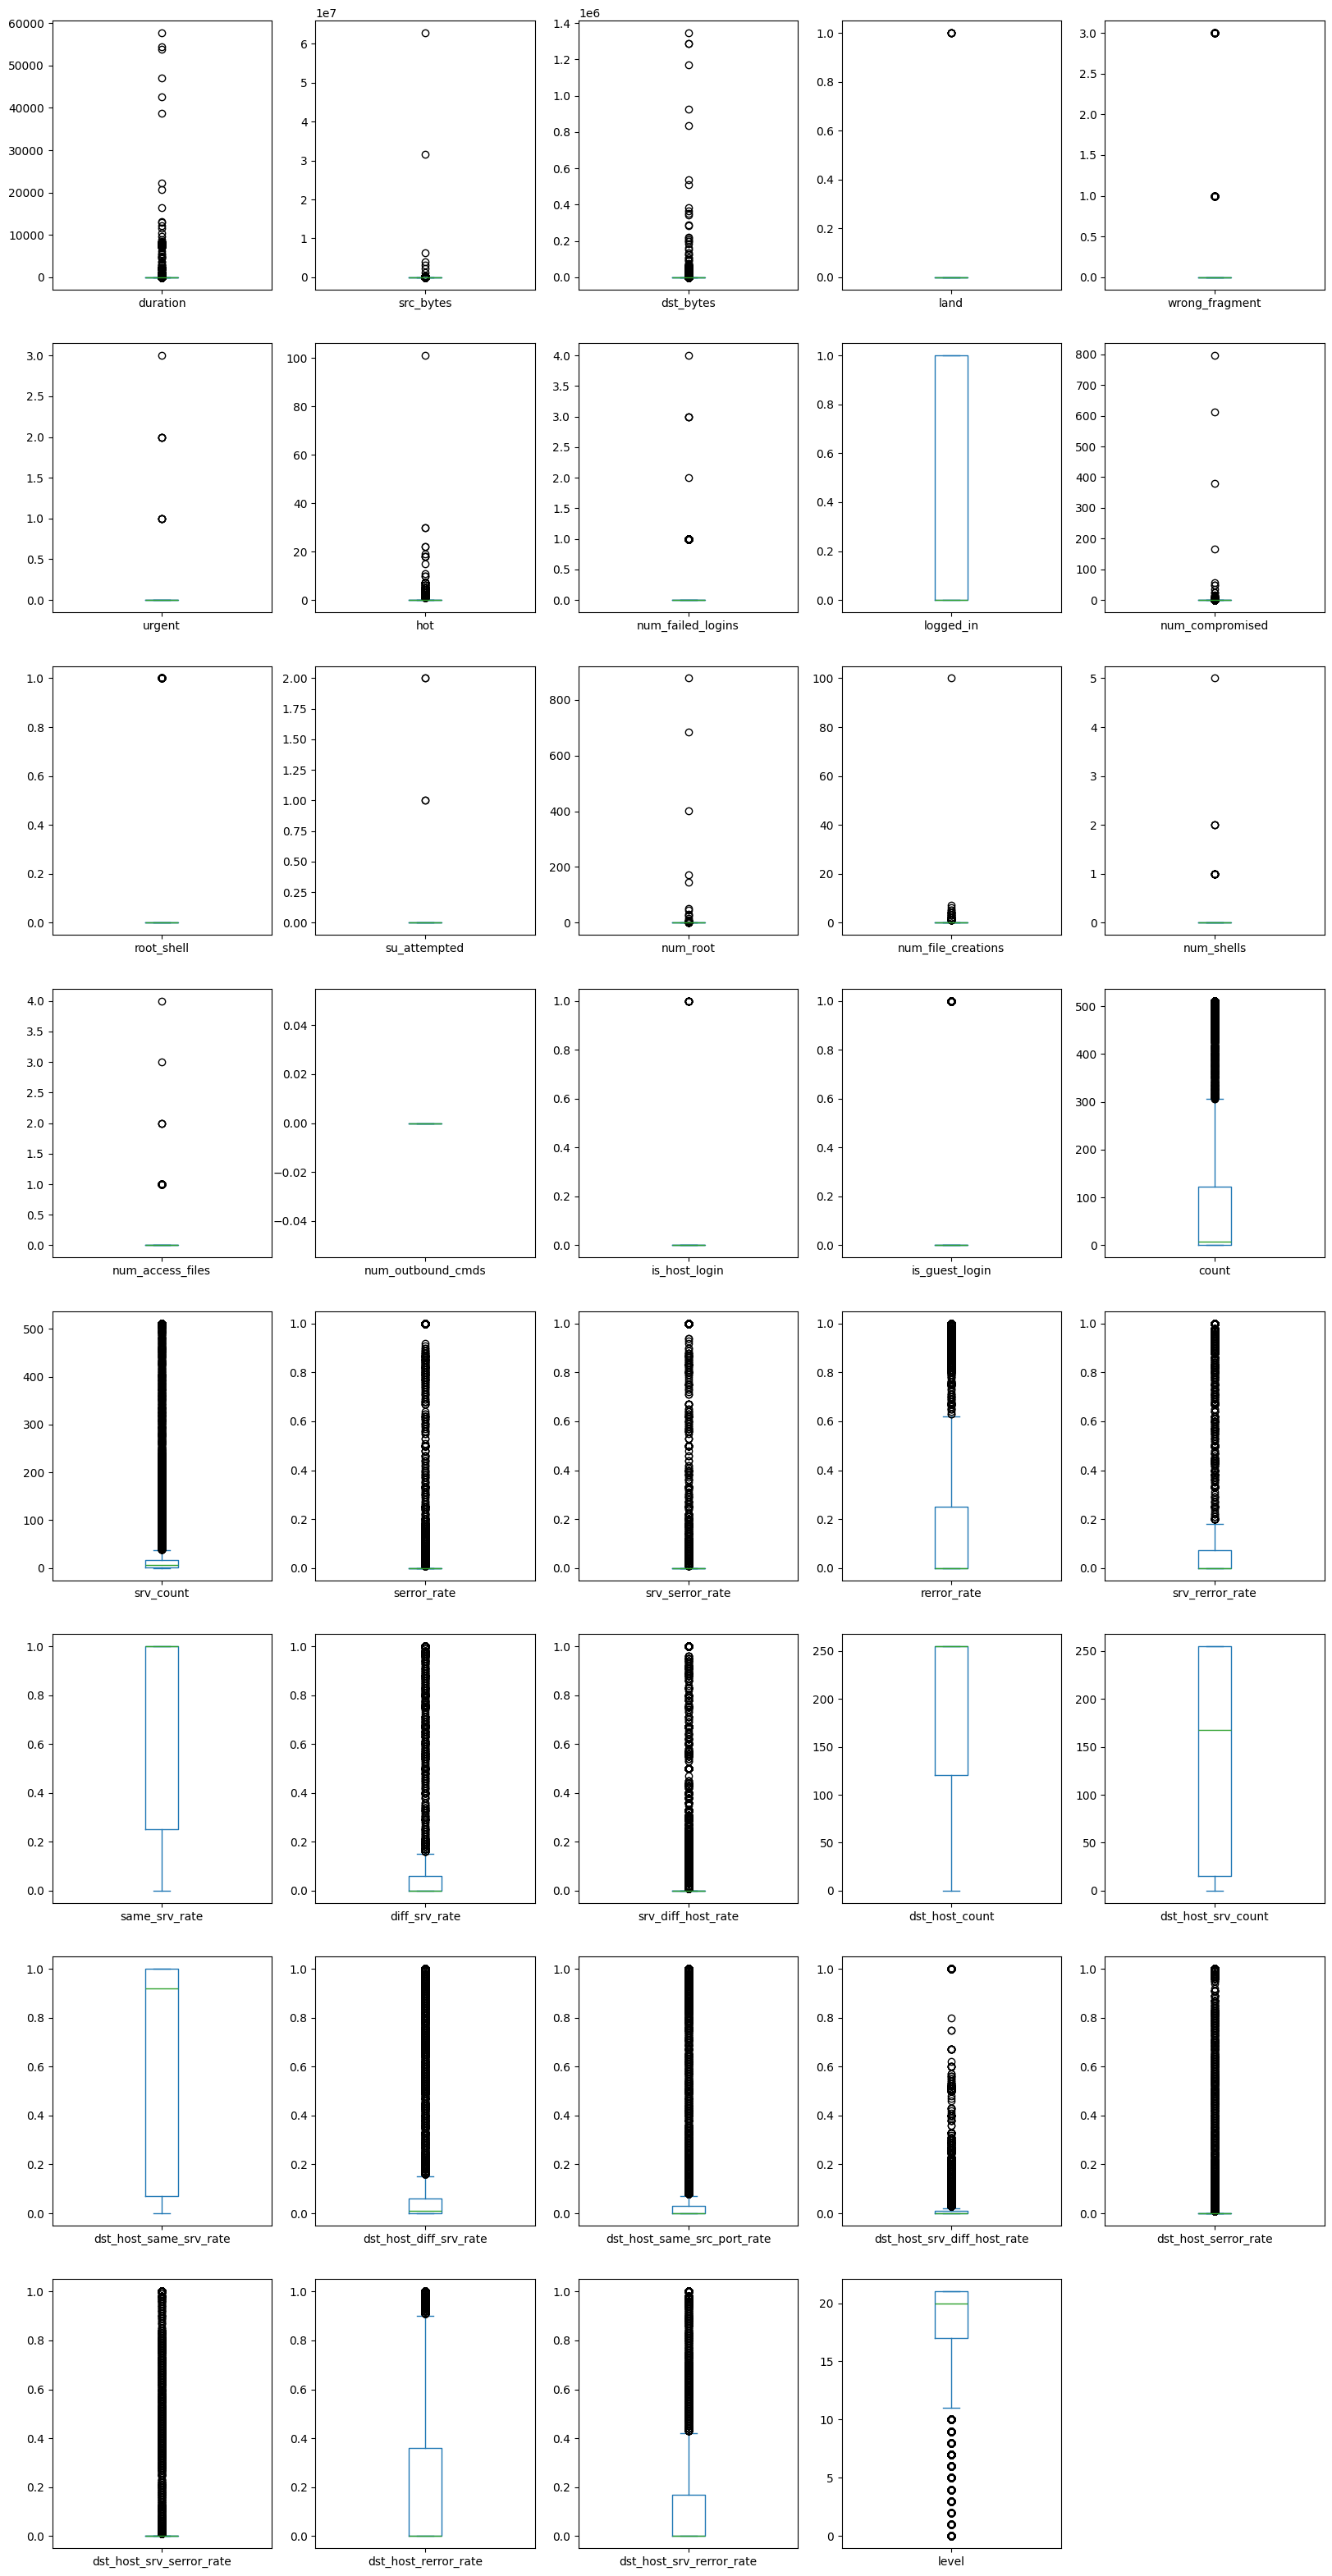

In [7]:
plt.figure(figsize=(20, 40))
df.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()

In [8]:
attack_n = []
for i in df.attack :
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("attack")
df['attack'] = attack_n 
df['attack'].unique()

array(['attack', 'normal'], dtype=object)

array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'src_bytes'}>,
        <Axes: title={'center': 'dst_bytes'}>,
        <Axes: title={'center': 'land'}>,
        <Axes: title={'center': 'wrong_fragment'}>,
        <Axes: title={'center': 'urgent'}>],
       [<Axes: title={'center': 'hot'}>,
        <Axes: title={'center': 'num_failed_logins'}>,
        <Axes: title={'center': 'logged_in'}>,
        <Axes: title={'center': 'num_compromised'}>,
        <Axes: title={'center': 'root_shell'}>,
        <Axes: title={'center': 'su_attempted'}>],
       [<Axes: title={'center': 'num_root'}>,
        <Axes: title={'center': 'num_file_creations'}>,
        <Axes: title={'center': 'num_shells'}>,
        <Axes: title={'center': 'num_access_files'}>,
        <Axes: title={'center': 'num_outbound_cmds'}>,
        <Axes: title={'center': 'is_host_login'}>],
       [<Axes: title={'center': 'is_guest_login'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title

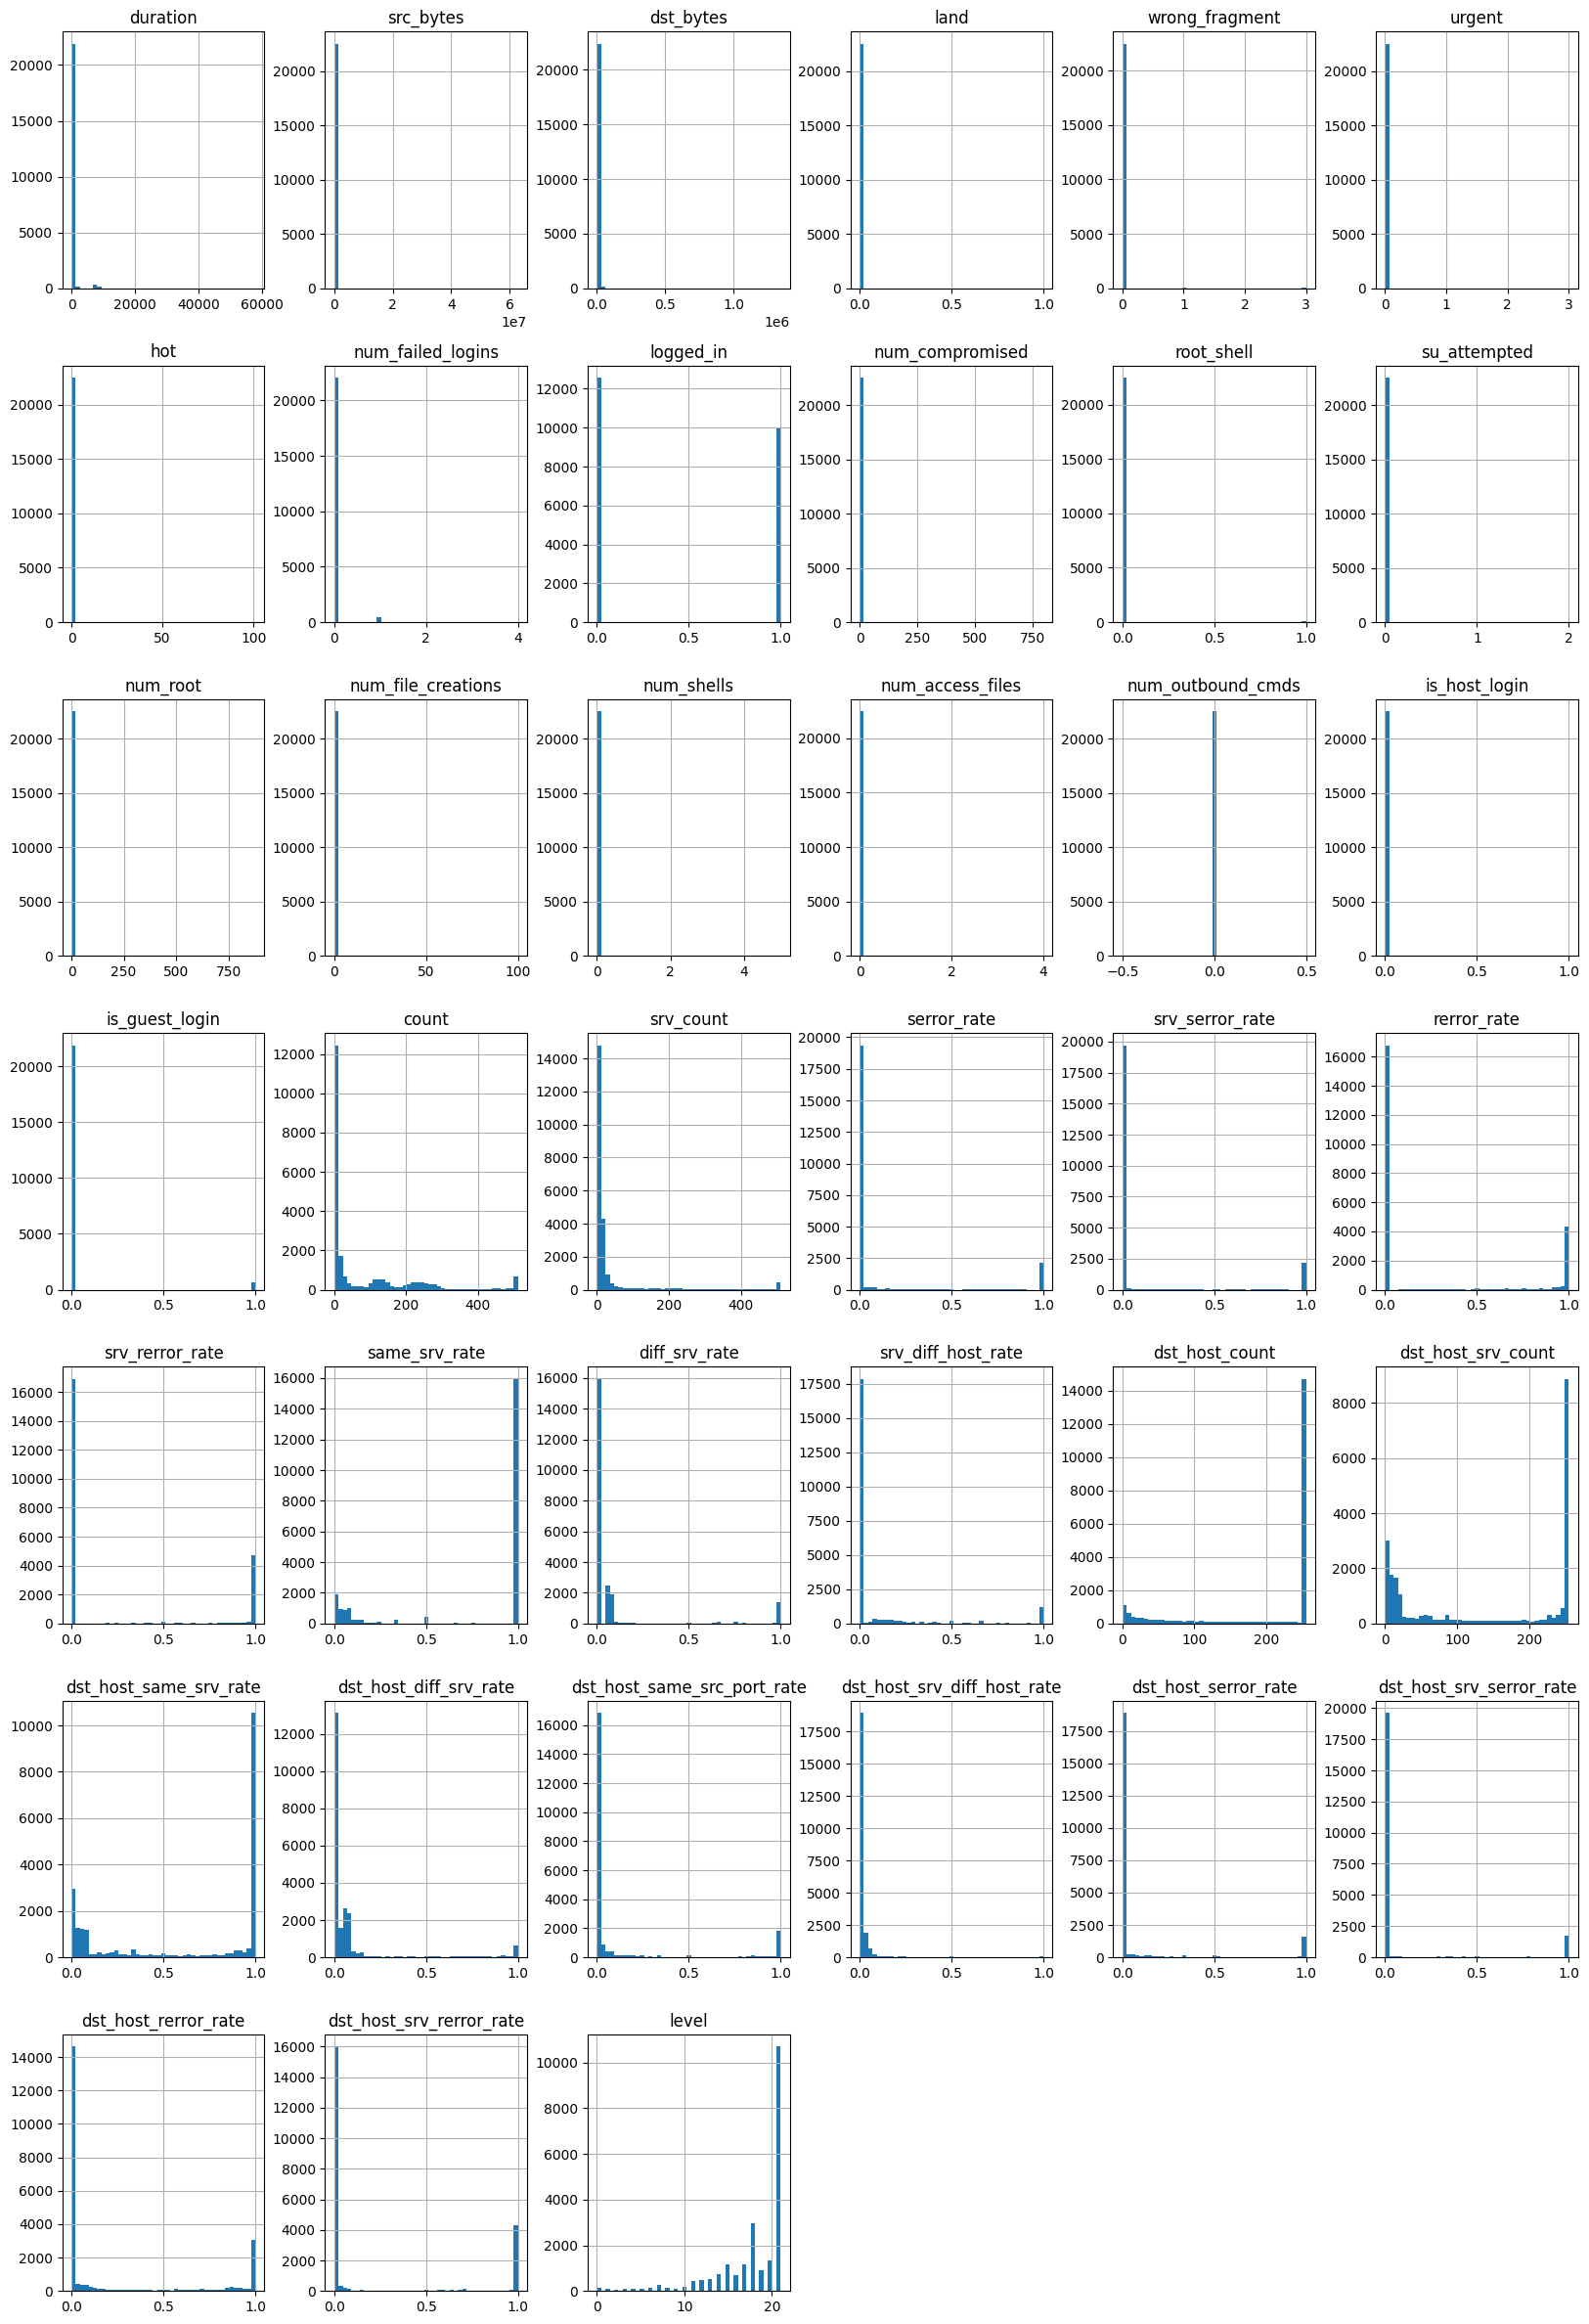

In [9]:
df.hist(bins=43,figsize=(20,30))